## Titanic Competition with Neural Networks

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Read Data

In [ ]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Train Data Preprocessing

### Recognize Data

In [4]:
train = train_data[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]]

In [5]:
train["Age"] = train["Age"].fillna(train["Age"].median())

<ipython-input-5-7a3eb368159b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"] = train["Age"].fillna(train["Age"].median())


In [6]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
train["Sex"] = train["Sex"].map({'male':0,'female':1}).astype(np.float32)

<ipython-input-7-d498d209afeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"] = train["Sex"].map({'male':0,'female':1}).astype(np.float32)


In [8]:
X = train.drop("Survived", axis=1).values.astype(np.float32)
y = train["Survived"].values.astype(np.float32)

### Transform Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Defining

Creating a nn model to predict survivors 

In [11]:
model = Sequential()

model.add(Dense(units = 3, activation="relu"))
model.add(Dense(units = 5, activation="relu"))
model.add(Dense(units = 5, activation="relu"))

model.add(Dense(units = 1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["Accuracy"])

In [12]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=5, validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.6028 - loss: 0.6851 - val_Accuracy: 0.5866 - val_loss: 0.6668
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.6139 - loss: 0.6594 - val_Accuracy: 0.5922 - val_loss: 0.6391
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.6365 - loss: 0.6365 - val_Accuracy: 0.6592 - val_loss: 0.6092
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.6834 - loss: 0.6117 - val_Accuracy: 0.6704 - val_loss: 0.5719
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7173 - loss: 0.5674 - val_Accuracy: 0.7095 - val_loss: 0.5315
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7728 - loss: 0.5048 - val_Accuracy: 0.7430 - val_loss: 0.4980
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7456 - loss: 0.5260 - val_Accuracy: 0.7598 - val_loss: 0.4729
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7998 - loss: 0.4568 - val_Accu

### Loss

In [13]:
history = pd.DataFrame(model.history.history)
history.head()

,Accuracy,loss,val_Accuracy,val_loss
0,0.610955,0.678722,0.586592,0.666820
1,0.640449,0.647784,0.592179,0.639130
2,0.675562,0.617615,0.659218,0.609243
3,0.712079,0.586482,0.670391,0.571884
4,0.737360,0.551116,0.709497,0.531508


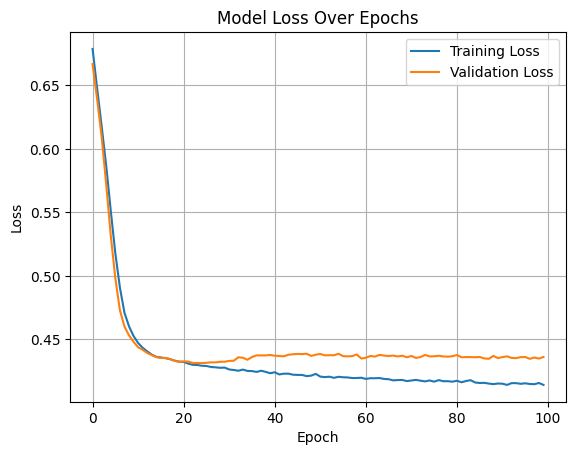

In [14]:
import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Accuracy

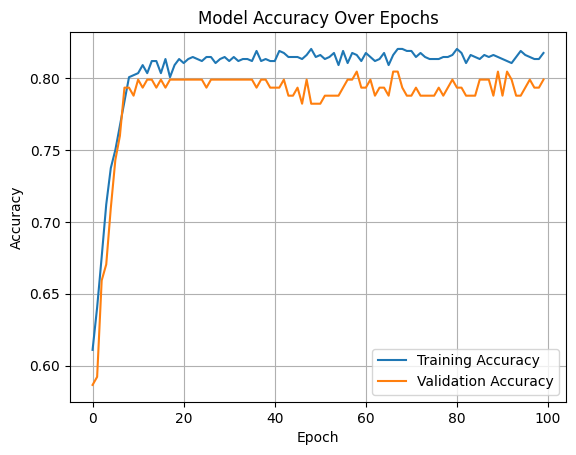

In [15]:
plt.plot(history['Accuracy'], label='Training Accuracy')
plt.plot(history['val_Accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Prediction From Test Data

### Test Data Preprocessing

In [16]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1}).astype(np.float32)

In [18]:
X_feature = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare']].values.astype(np.float32)

In [19]:
X_feature_scaled = scaler.transform(X_feature)

### Prediction

In [20]:
pred_prob = model.predict(X_feature_scaled)
predictions = (pred_prob > 0.5).astype(int).reshape(-1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [21]:
submission_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Read to CSV
submission_df.to_csv('titanic_submission.csv', index=False)
print("✅ 'titanic_submission.csv' has created")

✅ 'titanic_submission.csv' has created
